# 4.10 Coding Etiquette & Excel Reporting

### 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Turn project folder into path

path = r'/Users/lucerovargas/Documents/Data Analysis/Achievement 4- Python Fundamentals/12.2022 Instacart Basket Analysis'

In [3]:
# Import "ords_prods_cust" pkl into Jupyter dataframe as ords_prods_cust

final_df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'ords_prods_cust.pkl'))

### 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [4]:
# Check shape of data frame

final_df.shape

(32404859, 34)

In [5]:
# Check data types

final_df.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
orders_day_of_week           int64
order_hour_of_day            int64
days_since_prior_order     float64
new_customer                  bool
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
_merge                    category
price_range_loc             object
busiest_day                 object
busiest_days                object
busiest_hours               object
max_order                    int64
loyalty_flag                object
average_price_spent        float64
spending_flag               object
frequent_customers         float64
frequency_flag              object
First Name                  object
Last Name                   object
Gender                      object
State               

In [6]:
# Delete any duplicate/unecessary columns

df = final_df.drop(columns = ['_merge'])

In [7]:
df = df.drop(columns = ['new_customer'])

In [8]:
df = df.drop(columns = ['busiest_day'])

Note: A security concern can be having the First Name and Last Name. Will remove the name as the user_id can be used for identification

In [9]:
# Remove First and Last Name due to security

df = df.drop(columns = ['First Name', 'Last Name'])

In [10]:
# Confirm all changes

df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,frequent_customers,frequency_flag,Gender,State,Age,date_joined,n_dependants,Marital Status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


### 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [11]:
# Check dataframe dimension

df.shape

(32404859, 29)

In [12]:
# Check frequency for state column

df['State'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [13]:
# Defining Regions (function)

regionNE = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont']

In [14]:
regionSE = ['Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'South Carolina', 'Tennessee', 'Virginia', 'West Virginia', 'District of Columbia'] 

In [15]:
regionMW = ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Ohio', 'North Dakota', 'Nebraska', 'South Dakota', 'Wisconsin']

In [16]:
regionSW = ['Arizona', 'New Mexico', 'Oklahoma', 'Texas']

In [17]:
regionW = ['Alaska', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Nevada', 'Montana', 'Oregon', 'Utah', 'Washington', 'Wyoming']

In [18]:
# Create if-state with the loc function

df.loc[df['State'].isin (regionNE), 'region'] = 'Northeast'

In [19]:
df.loc[df['State'].isin (regionSE), 'region'] = 'Southeast'

In [20]:
df.loc[df['State'].isin (regionMW), 'region'] = 'Midwest'

In [21]:
df.loc[df['State'].isin (regionSW), 'region'] = 'Southwest'

In [22]:
df.loc[df['State'].isin (regionW), 'region'] = 'West'

In [23]:
# Check frequency

df['region'].value_counts(dropna = False)

Southeast    9499752
Midwest      7597325
West         6984455
Northeast    5722736
Southwest    2600591
Name: region, dtype: int64

In [24]:
# Check region
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequent_customers,frequency_flag,Gender,State,Age,date_joined,n_dependants,Marital Status,income,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Southeast
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Southeast
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Southeast
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Southeast
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Southeast


In [25]:
#Determine whether there's a difference in spending habits between the different U.S regions

crosstab = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [26]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
Southeast,184815,9314937
Southwest,50751,2549840
West,134479,6849976


There is a differencce in spending habits between the different U.S regions. There are more low-spenders overall in all the different regions. The data also shows that the high spenders are located in the West regions being Southwest, Midwest and West.

### 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample

Reviewed and will use 'max_order' column to create exclusion flag

In [27]:
#Derive exclusion flag

df.loc[df['max_order'] < 5, 'exclusion flag'] = 'low-activity'
df.loc[df['max_order'] >= 5, 'exclusion flag'] = 'high-activity'

In [28]:
df['exclusion flag'].value_counts(dropna = False)

high-activity    30964564
low-activity      1440295
Name: exclusion flag, dtype: int64

In [29]:
# check datframe

df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,Gender,State,Age,date_joined,n_dependants,Marital Status,income,region,exclusion flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Southeast,high-activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Southeast,high-activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Southeast,high-activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Southeast,high-activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Southeast,high-activity


In [30]:
# Dropping low activity from dataframe

df_2 = df.drop(df[df.max_order < 5].index)

In [31]:
# Check dataframe shape

df_2.shape

(30964564, 31)

In [32]:
# Export data frame excluding less than 5 orders

df_2.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'df_low_activity.pkl'))

### 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

** **
                                            AGE

In [33]:
df['Age'].describe()

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

The minimum age group is 18 and the max age group is 81 with the mean being 49. Will group with generation label

    A) Gen Z: 18-26
    B) Millennials: 27-42
    C) Gen X: 43-58
    D) Boomers II: 59-68
    E) Boomers I: 69-77
    F) Post War: 78-81

In [34]:
# Create age_flag

df.loc[df['Age'] <= 26, 'age_flag'] = 'Gen Z'

In [35]:
df.loc[(df['Age'] <= 42) & (df['Age'] >= 27), 'age_flag'] = 'Millennials'

In [36]:
df.loc[(df['Age'] <= 58) & (df['Age'] >= 43), 'age_flag'] = 'Gen X'

In [37]:
df.loc[(df['Age'] <= 68) & (df['Age'] >= 59), 'age_flag'] = 'Boomers II'

In [38]:
df.loc[(df['Age'] <= 77) & (df['Age'] >= 69), 'age_flag'] = 'Boomers I'

In [39]:
df.loc[df['Age'] >= 78, 'age_flag'] = 'Post War'

In [40]:
# Check value counts

df['age_flag'].value_counts(dropna = False)

Gen X          8183059
Millennials    8094045
Boomers II     4976444
Gen Z          4558002
Boomers I      4543726
Post War       2049583
Name: age_flag, dtype: int64

** **
                                        INCOME

In [41]:
df['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

The minimum income is 25,900 meanwhile the maximum is 593,000. Will group the income by the following groups
    
       A) Low: 32,048 or less
       B) Lower Middle: 32,049 - 53,413
       C) Middle Class: 53,414 - 106,827
       D) Upper-Middle Class: 106,828 - 373,894
       E) Wealthy: 373,895 and up

In [42]:
# Create income_flag
df.loc[df['income'] <= 32048, 'income_flag'] = 'Low Class'

In [43]:
df.loc[(df['income'] >= 32049) & (df['income'] <= 53413), 'income_flag'] = 'Lower Middle Class'

In [44]:
df.loc[(df['income'] >= 53414) & (df['income'] <= 106827), 'income_flag'] = 'Middle Class'

In [45]:
df.loc[(df['income'] >= 106828) & (df['income'] <= 373894 ), 'income_flag'] = 'Upper-Middle Class'

In [46]:
df.loc[df['income'] >= 373895, 'income_flag'] = 'Wealthy Class'

In [47]:
# Check frequency for income_flag

df['income_flag'].value_counts(dropna = False)

Middle Class          15246357
Upper-Middle Class    12811528
Lower Middle Class     3764233
Low Class               523753
Wealthy Class            58988
Name: income_flag, dtype: int64

** **
                                        DEPARTMENT

In [48]:
# Check department_id values

df['department_id'].value_counts(dropna = False)

4     9479291
16    5398747
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: department_id, dtype: int64

In [64]:
# Upload department data

df_dept = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'departments_wrangled.csv'))

In [73]:
df_dept.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [74]:
#Rename column Unnamed: 0 to department_id

df_dept.rename(columns = {'Unnamed: 0':'department_id'}, inplace = True)

In [75]:
# Combine data sets 

df_merge = df.merge(df_dept, on = 'department_id')

In [76]:
df_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Age,date_joined,n_dependants,Marital Status,income,region,exclusion flag,age_flag,income_flag,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,31,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower Middle Class,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower Middle Class,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower Middle Class,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower Middle Class,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower Middle Class,beverages


In [77]:
# Exporting data to complete another day

df_merge.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'df_merge.pkl'))

In [79]:
df.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'df.pkl'))

In [7]:
df_merge['department'].value_counts(dropna = False)

produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

In [9]:
# Create a data dictionary

dept = zip(df_merge['department_id'], df_merge['department'])

In [10]:
depts_dict = dict(dept)

In [12]:
depts_dict

{7: 'beverages',
 16: 'dairy eggs',
 19: 'snacks',
 17: 'household',
 4: 'produce',
 14: 'breakfast',
 13: 'pantry',
 3: 'bakery',
 1: 'frozen',
 9: 'dry goods pasta',
 15: 'canned goods',
 11: 'personal care',
 12: 'meat seafood',
 20: 'deli',
 6: 'international',
 5: 'alcohol',
 21: 'missing',
 8: 'pets',
 18: 'babies',
 2: 'other',
 10: 'bulk'}

Departments are categorized already by section. Will not to do a flag since I will use a visual later

In [15]:
df_merge.shape

(32404859, 35)

** **
                                            NUMBER OF DEPENDANTS

In [8]:
df_merge['n_dependants'].value_counts(dropna = False)

3    8135109
0    8097503
2    8091143
1    8081104
Name: n_dependants, dtype: int64

The dependants range from 0-3 dependants. I will range as follows

    A) Single Adult: 0 dependants
    B) Family with baby: if their order falls under department of id 18 'babies'
    C) Family: 1-3 dependants and if their order does not include id 18 'babies'

In [24]:
# Create a flag for family_status

df_merge.loc[df_merge['n_dependants'] <= 0, 'family_flag'] = 'single adult'

In [21]:
df_merge.loc[(df_merge['department_id'] == 18) & (df_merge['n_dependants'] > 0), 'family_flag'] = 'family with baby'

In [22]:
df_merge.loc[(df_merge['department_id'] !=18) & (df_merge['n_dependants'] > 0), 'family_flag'] = 'family'

In [25]:
df_merge['family_flag'].value_counts(dropna = False)

family              23990048
single adult         8097503
family with baby      317308
Name: family_flag, dtype: int64

In [28]:
df_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,n_dependants,Marital Status,income,region,exclusion flag,age_flag,income_flag,department,family_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower Middle Class,beverages,family
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower Middle Class,beverages,family
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower Middle Class,beverages,family
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower Middle Class,beverages,family
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower Middle Class,beverages,family


### 6. Create an appropriate visualization to show the distribution of profiles

<AxesSubplot:>

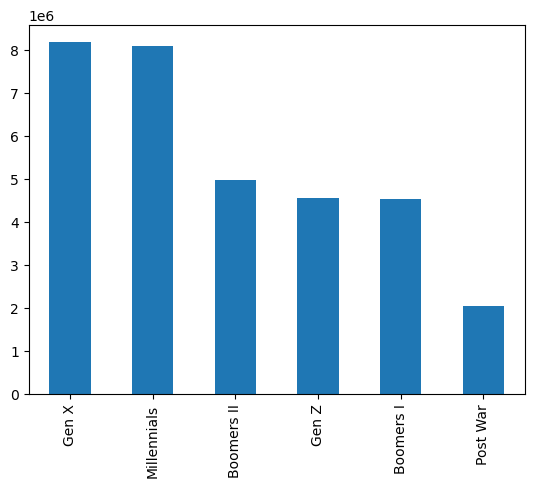

In [30]:
# Create bar chart for age_flag 

df_merge['age_flag'].value_counts().plot.bar()

Most of the customers are Gen X or Millennials

<AxesSubplot:>

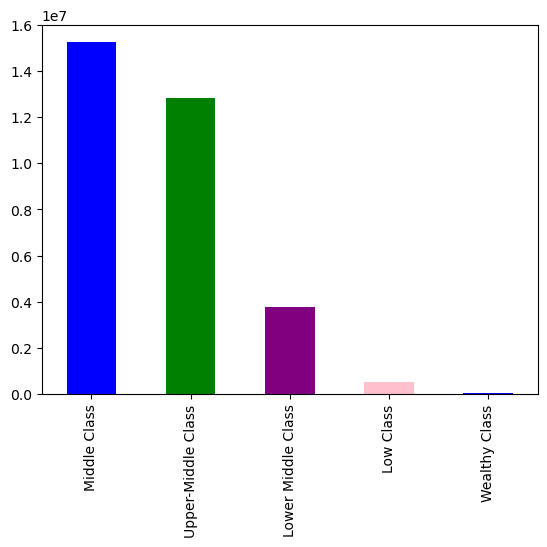

In [33]:
# Create bar chart for income_flag

df_merge['income_flag'].value_counts().plot.bar(color = ['blue', 'green', 'purple', 'pink'])

<AxesSubplot:>

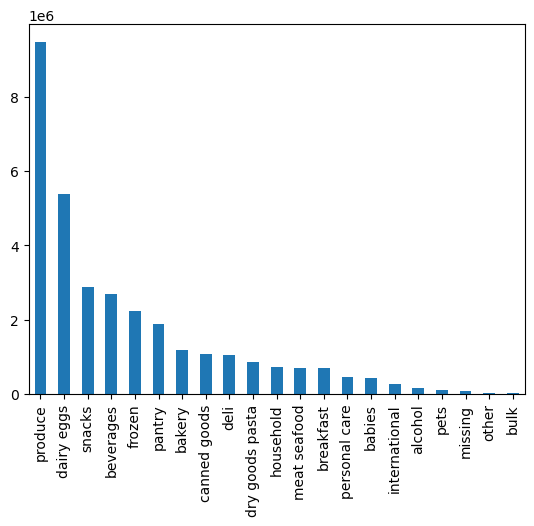

In [36]:
# create chart for deparment

df_merge['department'].value_counts().plot.bar()

<AxesSubplot:>

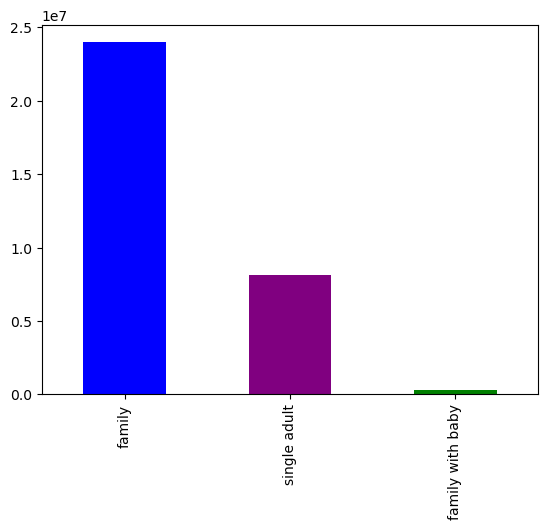

In [38]:
df_merge['family_flag'].value_counts().plot.bar(color = ['blue', 'purple', 'green'])

In [39]:
# Exporting data to complete another day

df_merge.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'df_merge.pkl'))
df.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'df.pkl'))